<a href="https://colab.research.google.com/github/rayj1981/STA4950/blob/main/Raymond_Jiang_STA4950_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1: Gradient Descent**

Gradient descent updates parameters using

$$
w_{t+1} = w_t - \eta \frac{dJ}{dw}
$$

1. Suppose $J(w) = (w - 3)^2$. Let $w_0 = 0$ and $\eta = 0.05$.
   1. Compute $w_i$ for $i=1,2, \cdots, 5$

2. Suppose $J(w) = (w - 3)^2$. Let $w_0 = 0$ and $\eta = 0.5$.
   1. Compute $w_i$ for $i=1,2, \cdots, 5$

3. Explain the role of the learning rate $\eta$.

4. What happens if $\eta$ is too large? What happens if it is too small?



 $$\frac{dJ}{dw} = 2(w-3) = 2w-6 $$
1. $$ \eta = 0.05 \\ $$

$$w_{1} = w_{0} - \eta \cdot \frac{dJ}{dw} = 0 - 0.05 \cdot (2(0)-6) = 0 - 0.05 \cdot (-6) = 0+0.3 = 0.3$$

$$w_{2} = w_{1} - \eta \cdot \frac{dJ}{dw} = 0.3 - 0.05 \cdot (2(0.3)-6) = 0.3 - 0.05 \cdot (0.6-6) = 0.3 - 0.05\cdot(-5.4) = 0.3 + 0.27 = 0.57 \\ $$

$$w_{3} =0.813 $$

$$w_{4} = 1.032 $$

$$w_{5} = 1.229 \\ $$







2. $$ \eta = 0.5 \\ $$
$$w_{1} = 3 $$
$$w_{2} = 3 $$
$$w_{3} = 3 $$
$$w_{4} = 3 $$
$$w_{5} = 3 $$


3. The learning rate $\eta$ takes in the role of how much the model should change / step.
4. If $\eta$ is too large then it would take random steps way off of what it wants to achieve. Making the model bounce around overshooting the minimum.
If $\eta$ is too small the model will take tiny steps to the left ot right to reach the minimum . However The amount of iterations makes the model computationally expensive and slow


In [1]:
def gradient_descent(w_0, eta, num_iterations):
    w = w_0
    w_values = [w_0]
    for i in range(num_iterations):
        dw = 2 * (w - 3)
        w = w - eta * dw
        w_values.append(round(w,3))
    return w_values

gradient_descent(0, 0.05, 5)


[0, 0.3, 0.57, 0.813, 1.032, 1.229]

In [2]:
gradient_descent(0,0.5,5)

[0, 3.0, 3.0, 3.0, 3.0, 3.0]

# **Problem 2: Chain Rule (Single Neuron)**

Let $y \in \{0, 1\}$ be a binary label. Define the model output and loss as

$$
\widehat{y} = \sigma(wx), \quad \sigma(z) = \frac{1}{1 + e^{-z}}
$$

$$
L = -\big[ y \log(\widehat{y}) + (1 - y)\log(1 - \widehat{y}) \big]
$$

**(a)** Use the chain rule to compute $\dfrac{dL}{dw}$.

**(b)** Clearly identify each intermediate derivative in the chain rule.

**(c)** Explain why the chain rule is required to compute the derivative of $L$ with respect to $w$ in this model.

**(d)** Explain why cross-entropy loss is a sensible choice for binary classification.


a) & b)

Linear function $z = wx $

Soft max / sigmoid function  $\widehat{y} = \sigma(z) $

Loss function $L = -\big[ y \log(\widehat{y}) + (1 - y)\log(1 - \widehat{y}) \big] $


$\dfrac{dL}{dw} = \dfrac{dL}{d\widehat{y}} \cdot \dfrac{d\widehat{y}}{dz} \cdot \dfrac{dz}{dw}$

$$
\frac{dL}{d\hat{y}} = -\left[ \frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}} \right] = \frac{\hat{y} - y}{\hat{y}(1-\hat{y})}
$$

$$
\dfrac{d\widehat{y}}{dz} = \hat{y}(1-\hat{y})
$$

$$
\dfrac{dz}{dw} = x
$$

$\dfrac{dL}{dw} = \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \cdot\hat{y}(1-\hat{y}) \cdot x = ({\hat{y} - y}) \cdot x $


c) The chain rule is reuqired to compute the derertive of L becuase of the many different fucntion it has in it.  loss $L$ is a function of $\hat{y}$, which is a function of $z$, which is finally a function of $w$.


d) This Loss is a good  choice because it acts as a logical switch. Since $y$ is always $0$ or $1$. If $y=1$, the $(1-y)$ term becomes $0$, leaving only $-\log(\hat{y})$.If $y=0$, the $y$ term becomes $0$, leaving only $-\log(1-\hat{y})$.This ensures the model only focuses on maximizing the probability of the correct label.





# **Problem 3: Gradient Descent and Learning Rate Effects**

In this problem, you will study how the **learning rate** affects gradient descent behavior.
Gradients will be computed **numerically and manually**, not using autograd.

We consider the objective function

$$
f(x_1, x_2) = (x_1 - a)^2 + c(x_2 - b)^2
$$

where $a = 1$, $b = -2$, and $c = 2$.

---

### **Part (a): Manual Gradient Computation**

1. Compute the partial derivatives:
   $$
   \frac{\partial f}{\partial x_1}, \quad \frac{\partial f}{\partial x_2}
   $$

2. Write the gradient as a vector:
   $$
   \nabla f(x_1, x_2)
   $$

---

### **Part (b): Implement Gradient Descent Using Your Gradient**

You are given starter code that:
- Uses **numerical gradients** (finite differences)
- Runs gradient descent
- Visualizes the optimization path and loss

Replace the numerical gradient with **your manually computed gradient** from Part (a).

---

### **Part (c): Learning Rate Experiments**

Run gradient descent using **two different learning rates**, for example:
- A small learning rate (e.g. `lr = 0.01`)
- A larger learning rate (e.g. `lr = 0.2`)

For each learning rate:
- Plot the contour of the function
- Plot the gradient descent path
- Plot the loss as a function of iteration

---

### **Part (d): Analysis Questions**

1. How does the optimization path differ between the two learning rates?
2. Which learning rate converges faster?
3. Does either learning rate cause oscillation or instability? Why?
4. Why is the learning rate critical even for a simple quadratic function?

---

### **Part (e) Numerical vs Manual Gradients**

1. Compare the numerical gradient with your manually computed gradient.
2. When might numerical gradients be useful in practice?


a)
1.
   $$
   \frac{\partial f}{\partial x_1} = 2(x_1 - a)
   $$

  $$
  \frac{\partial f}{\partial x_2} = 2c(x_2-b)
  $$

2. $$
   \nabla f(x_1, x_2) = (2(x_1 - a),2c(x_2-b))
  $$
   When a= 1 , b= -2 c= 2
  $$
   \nabla f(x_1, x_2) = (2(x_1 - 1),4(x_2+2))
  $$


d)
1.
The small learning rate $0.01$ takes tiny step and the line is very curved and straight with no sudden elbows. The loss is reduced very slowly and consistently the same

The large learning rate $0.2$ takes much larger jumps where the turns are very sharp up until a certain point. Almost 90% of the loss is reduced in just one step

2.
When $lr=0.2$ it converges significantly faster. It reaches the minimum in fewer iterations, whereas $lr=0.01$ would require hundreds of steps to reach the same point.

3.
I think the lr can cause both oscillation and diversion. When $lr = 0.2$ the model performed decent however if the learning rate were increased further, the sharp turns would likely turn into full oscillations across the graphs, as the step size would be too large leading to instability or divergence.


At $lr=0.2$, you may notice a slight zig-zag behavior if the rate were any higher. This is because $c=2$ makes the $x_2$ direction steeper. If $lr$ exceeds $0.5$ (the reciprocal of the largest eigenvalue of the Hessian), the system becomes unstable and will oscillate or diverge.

4.
The lr is critical, the wrong lr can lead failure. A too small lr leads to the model being too computationally expensive/slow. While a too large lr overshoots the minimum potentially bouncing back and forwards.



e)
Numerical gradients  are approximations that involve a small error called eps while the manual gradients are exact.

One practical use of numerical gradient is that if the function is unknown or too complex to do partial differentiation with.





  

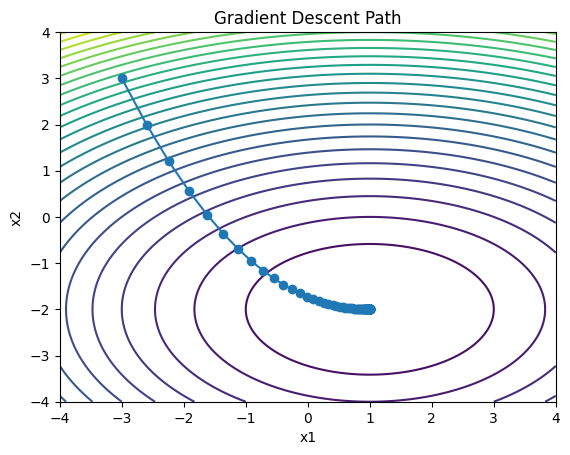

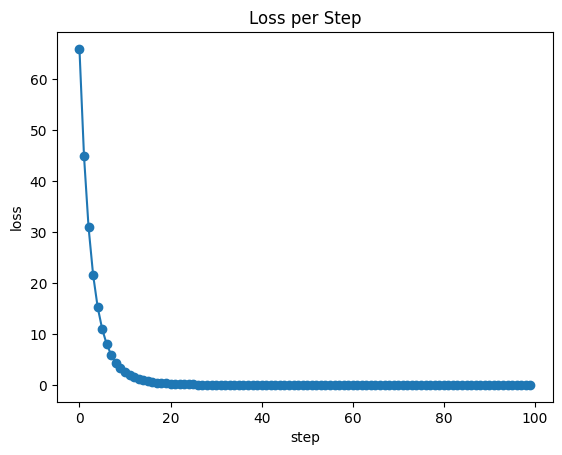

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1) simple function
def f(x1, x2, a=1.0, b=-2.0, c=2.0):
    return (x1 - a) ** 2 + c * (x2 - b) ** 2


# 2) numerical gradient (finite differences)
def numerical_grad(x1, x2, eps=1e-5, a=1.0, b=-2.0, c=2.0):
    df_dx1 = 2 * (x1 - a)
    df_dx2 = 2 * c * (x2 - b)
    return np.array([df_dx1, df_dx2])


# 3) gradient descent loop
def gradient_descent(
    x1_init=-3.0,
    x2_init=3.0,
    lr=0.05,
    steps=100,
    a=1.0,
    b=-2.0,
    c=2.0,
):
    x = np.array([x1_init, x2_init], dtype=float)
    path = []
    losses = []

    for _ in range(steps):
        path.append(x.copy())
        losses.append(f(x[0], x[1], a, b, c))

        grad = numerical_grad(x[0], x[1], a=a, b=b, c=c)
        x = x - lr * grad

    return np.array(path), np.array(losses)


# 4) visualization
def plot_contour_and_path(path, a=1.0, b=-2.0, c=2.0, x1lim=(-4, 4), x2lim=(-4, 4)):
    x1s = np.linspace(*x1lim, 300)
    x2s = np.linspace(*x2lim, 300)
    X1, X2 = np.meshgrid(x1s, x2s)
    Z = (X1 - a) ** 2 + c * (X2 - b) ** 2

    plt.figure()
    plt.contour(X1, X2, Z, levels=30)
    plt.plot(path[:, 0], path[:, 1], marker="o")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Gradient Descent Path")
    plt.show()


def plot_loss(losses):
    plt.figure()
    plt.plot(losses, marker="o")
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.title("Loss per Step")
    plt.show()


# Example run
path, losses = gradient_descent(lr=0.05)
plot_contour_and_path(path)
plot_loss(losses)


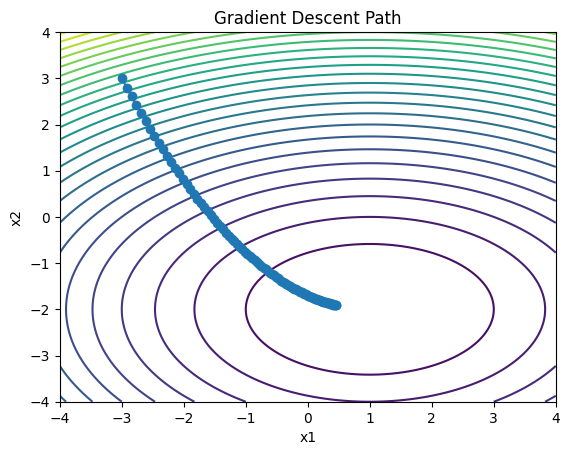

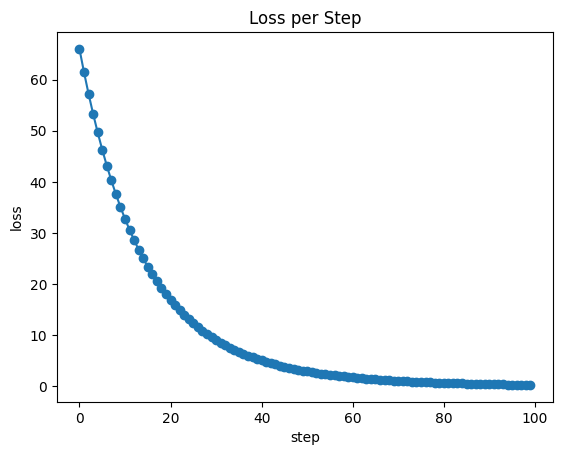

In [4]:
path, losses = gradient_descent(lr=0.01)
plot_contour_and_path(path)
plot_loss(losses)

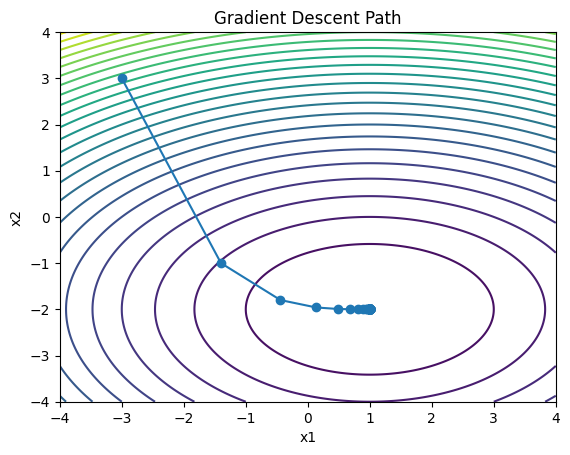

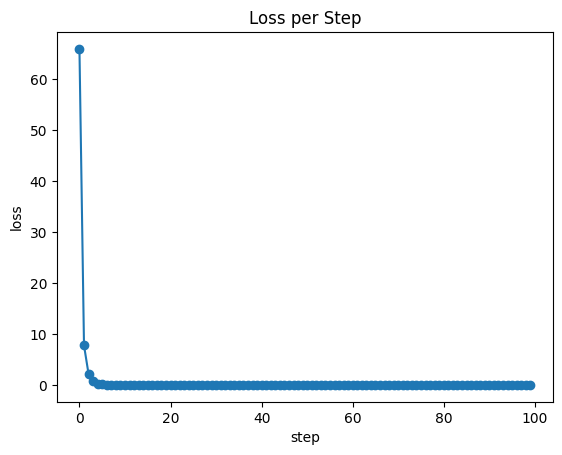

In [5]:
path, losses = gradient_descent(lr=0.2)
plot_contour_and_path(path)
plot_loss(losses)

# **Problem 4: From the first 50 pages of the Deep Learning Book**

- What happens during the 'inference' stage of machine learning?

The inference stage happens after the model has been trained.Then the model takes in unseen data and processes to produce a classification or a prediction. Inference is using the model to get answers.


- Why is machine learning often described as an 'ill-posed problem'?

Machine learning is often described as an ill-posed problem because it is only trained using a set amount of data and does not contain enough information to necessarily indicate a true rule that applies to all cases.

- What describes 'overfitting' in a machine learning model?

Overfitting is when the model is tuned exactly to the sample data but does poorly on the test data losing the ability to generalize. Instead of getting the patterns the model  memorizes the training set.
- What is 'inductive bias' in the context of a machine learning algorithm?

When the training data alone is not enough to define a perfect rule for most  cases, the inductive bias acts as a  constraint that helps the model to a  type of generalization.



# **Problem 5: From 2D Gaussian to Elliptical Confidence Contours**

Consider a 2D Gaussian (normal) distribution with mean $\mu \in \mathbb{R}^2$ and covariance matrix $\Sigma \in \mathbb{R}^{2\times 2}$ (symmetric, positive definite). Its density is

$$p(x) = \frac{1}{2\pi|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)\right)$$

In EM-based Gaussian Mixture Models (GMMs), we often visualize each component by drawing an ellipse corresponding to a chosen confidence level (e.g., $\approx 95\%$). This problem derives that ellipse **from first principles**.

---


**(a)** Show that the **equal-density contours** of $p(x)$ are the level sets of the quadratic form

$$(x-\mu)^T \Sigma^{-1} (x-\mu) = c$$

for some constant $c > 0$. (Hint: take $\log p(x)$ and isolate the quadratic form.)

**(b)** Explain why these level sets are **ellipses** when $\Sigma$ is symmetric positive definite.


Let the eigendecomposition be $\Sigma = V \Lambda V^T$, where

$$\Lambda = \text{diag}(\lambda_1, \lambda_2), \quad \lambda_1 \ge \lambda_2 > 0, \quad V = [v_1 \; v_2], \; V^T V = I$$

Show that under the change of variables $y = V^T (x-\mu)$, the quadratic form becomes

$$(x-\mu)^T \Sigma^{-1} (x-\mu) = \frac{y_1^2}{\lambda_1} + \frac{y_2^2}{\lambda_2}$$

**(c)** Hence, prove that the level set $(x-\mu)^T \Sigma^{-1} (x-\mu) = c$ is an ellipse centered at $\mu$ with **principal axes directions** given by $v_1, v_2$ and **semi-axis lengths**

$$a_1 = \sqrt{c\,\lambda_1}, \qquad a_2 = \sqrt{c\,\lambda_2}$$

State clearly how the **rotation angle** of the ellipse relates to the eigenvectors.

**(d)** Let $X \sim N(\mu, \Sigma)$. Define the **Mahalanobis distance squared**

$$D^2(X) = (X-\mu)^T \Sigma^{-1} (X-\mu)$$

Show that $D^2(X) \sim \chi^2_2$ (chi-square distribution with 2 degrees of freedom).

**(e)** Let $c_\alpha$ be the $\alpha$-quantile of $\chi^2_2$, i.e.,

$$\mathbb{P}\left(D^2(X) \le c_\alpha\right) = \alpha$$

Explain why the ellipse

$$(x-\mu)^T \Sigma^{-1} (x-\mu) = c_\alpha$$

captures a proportion $\alpha$ of the probability mass (e.g., $\alpha = 0.95$ for a $95\%$ ellipse).

(a) Proving the Level SetsTo show that the contours of $p(x)$ are level sets of the quadratic form, we start with the density function:$$p(x) = \frac{1}{2\pi|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)\right)$$Set $p(x)$ to a constant $k$: We want to find all $x$ where the density is the same.

Take the natural log ($\ln$):$$\ln(k) = \ln\left(\frac{1}{2\pi|\Sigma|^{1/2}}\right) - \frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)$$Isolate the $x$ terms:$$\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) = \ln\left(\frac{1}{2\pi|\Sigma|^{1/2}}\right) - \ln(k)$$Multiply by $2$:$$(x-\mu)^T \Sigma^{-1} (x-\mu) = 2 \left[ \ln\left(\frac{1}{2\pi|\Sigma|^{1/2}}\right) - \ln(k) \right]$$Since everything on the right side is a constant, we can call this constant $c$.

contour is defined by:$$(x-\mu)^T \Sigma^{-1} (x-\mu) = c \\ $$



(b) Change of Variables to Ellipse use the eigendecomposition $\Sigma = V\Lambda V^T$. Since $V$ is orthogonal ($V^T = V^{-1}$), the inverse is:$$\Sigma^{-1} = (V\Lambda V^T)^{-1} = (V^T)^{-1} \Lambda^{-1} V^{-1} = V \Lambda^{-1} V^T$$Substitute $\Sigma^{-1}$ into the quadratic form:$$(x-\mu)^T (V \Lambda^{-1} V^T) (x-\mu) = c$$Define $y = V^T(x-\mu)$: This is a transformation that centers the data at $\mu$ and rotates it. Notice that $y^T = (x-\mu)^T V$.Rewrite the equation:$$y^T \Lambda^{-1} y = c$$Since $\Lambda^{-1} = \text{diag}(1/\lambda_1, 1/\lambda_2)$, this expands to:$$\begin{bmatrix} y_1 & y_2 \end{bmatrix} \begin{bmatrix} 1/\lambda_1 & 0 \\ 0 & 1/\lambda_2 \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \frac{y_1^2}{\lambda_1} + \frac{y_2^2}{\lambda_2} = c \\ $$


(c) Take the result from part (b) and divide by $c$:$$\frac{y_1^2}{c\lambda_1} + \frac{y_2^2}{c\lambda_2} = 1$$Identify Semi-axes: In the standard ellipse equation $\frac{y_1^2}{a_1^2} + \frac{y_2^2}{a_2^2} = 1$, the lengths are the square roots of the denominators:$a_1 = \sqrt{c\lambda_1}$$a_2 = \sqrt{c\lambda_2}$Rotation Angle: The transformation $y = V^T(x-\mu)$ means the axes of the ellipse are the columns of $V$.

If $v_1 = [v_{1,1}, v_{1,2}]^T$, then the angle $\theta$ of the major axis is:$$\theta = \arctan\left(\frac{v_{1,2}}{v_{1,1}}\right)$$


(d)
$$\Lambda^{-1} = \begin{bmatrix} 1/\lambda_1 & 0 \\ 0 & 1/\lambda_2 \end{bmatrix} = \begin{bmatrix} 1/\sqrt{\lambda_1} & 0 \\ 0 & 1/\sqrt{\lambda_2} \end{bmatrix} \begin{bmatrix} 1/\sqrt{\lambda_1} & 0 \\ 0 & 1/\sqrt{\lambda_2} \end{bmatrix} = \Lambda^{-1/2} \Lambda^{-1/2}$$

$$\Sigma^{-1} = V \Lambda^{-1} V^T$$

$$\Sigma^{-1} = (V \Lambda^{-1/2}) (V \Lambda^{-1/2})^T$$

Let $Z = \Lambda^{-1/2} V^T (X - \mu)$.

$D^2(X) = (X-\mu)^T \Sigma^{-1} (X-\mu) = (X-\mu)^T (V \Lambda^{-1/2}) (\Lambda^{-1/2} V^T) (X-\mu)$
$D^2(X) = Z^T Z = Z_1^2 + Z_2^2$

Since we have 2 variables ($Z_1$ and $Z_2$):$$D^2(X) \sim \chi_2^2$$

(e)

The ellipse is a contour of constant density. By picking $c_\alpha$ from the Chi-square table, you are essentially drawing a line at the right distance so that the volume under the surface inside that line equals exactly $\alpha$.

If $\alpha = 0.95$, the math tells us that $c_\alpha \approx 5.99$. Any point with a Mahalanobis distance squared less than 5.99 is inside the 95% zone, and any point higher than that is in the remaining 5% tail of the distribution.